**Import Libraries**

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# from google.colab import drive
# drive.mount('/content/drive')

**Load and Explore the Dataset**

In [3]:

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/US_Accidents_March23_sampled_500k.csv')

# Display the first few rows to understand the data
print(data.head())

# Check for any missing values
print(data.isnull().sum())

# Select features (X) and target variable (y)
X = data[['Temperature(F)', 'Wind_Direction', 'Sunrise_Sunset']]  # Specify your features
y = data['Severity']  # Specify your target variable


          ID   Source  Severity                     Start_Time  \
0  A-2047758  Source2         2            2019-06-12 10:10:56   
1  A-4694324  Source1         2  2022-12-03 23:37:14.000000000   
2  A-5006183  Source1         2  2022-08-20 13:13:00.000000000   
3  A-4237356  Source1         2            2022-02-21 17:43:04   
4  A-6690583  Source1         2            2020-12-04 01:46:00   

                        End_Time  Start_Lat   Start_Lng    End_Lat  \
0            2019-06-12 10:55:58  30.641211  -91.153481        NaN   
1  2022-12-04 01:56:53.000000000  38.990562  -77.399070  38.990037   
2  2022-08-20 15:22:45.000000000  34.661189 -120.492822  34.661189   
3            2022-02-21 19:43:23  43.680592  -92.993317  43.680574   
4            2020-12-04 04:13:09  35.395484 -118.985176  35.395476   

      End_Lng  Distance(mi)  ... Roundabout Station   Stop Traffic_Calming  \
0         NaN         0.000  ...      False   False  False           False   
1  -77.398282         0.05

**Data Preprocessing**

In [4]:
# Handle missing values (if any)
X.fillna(0, inplace=True)  # Replace NaN values with 0, or use other strategies

# Encode categorical variables (if any)
X = pd.get_dummies(X)  # Convert categorical variables into dummy/indicator variables

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (if required)
# Scaling is not necessary for all algorithms, but may be beneficial for some
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

C:\Users\alfre\AppData\Local\Temp\ipykernel_2576\4060949411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)  # Replace NaN values with 0, or use other strategies


**XGBoost**

In [5]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Initialize the XGBoost regressor
xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)

# Fit the model to the training data
xgb_reg.fit(X_train, y_train)

# Predict on the testing data
y_pred_xgb = xgb_reg.predict(X_test)

# Calculate Mean Squared Error (MSE) for XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("XGBoost Mean Squared Error:", mse_xgb)

# Calculate R-squared for XGBoost
r2_xgb = r2_score(y_test, y_pred_xgb)
print("XGBoost R-squared:", r2_xgb)



XGBoost Mean Squared Error: 0.2303293277018955
XGBoost R-squared: 0.03140450310484


Light GBM

In [6]:
import lightgbm as lgb
import warnings
from sklearn.metrics import mean_squared_error, r2_score
LOKY_MAX_CPU_COUNT = 6
warnings.filterwarnings("ignore") 

lgb_reg = lgb.LGBMRegressor(objective='regression', random_state=42)

# Fit the model to the training data
lgb_reg.fit(X_train, y_train)

# Predict on the testing data
y_pred_lgb = lgb_reg.predict(X_test)

# Calculate Mean Squared Error (MSE) for LightGBM
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
print("LightGBM Mean Squared Error:", mse_lgb)

# Calculate R-squared for LightGBM
r2_lgb = r2_score(y_test, y_pred_lgb)
print("LightGBM R-squared:", r2_lgb)

  File "c:\Users\alfre\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\alfre\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\alfre\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\alfre\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001521 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 268
[LightGBM] [Info] Number of data points in the train set: 400000, number of used features: 29
[LightGBM] [Info] Start training from score 2.212630
LightGBM Mean Squared Error: 0.22992748668194143
LightGBM R-squared: 0.033094350447680276


**Result and Visualization**


XG Boost Results:
Mean Squared Error: 0.2303293277018955
R-squared: 0.03140450310484

LightGBM Results:
Mean Squared Error: 0.22992748668194143
R-squared: 0.033094350447680276


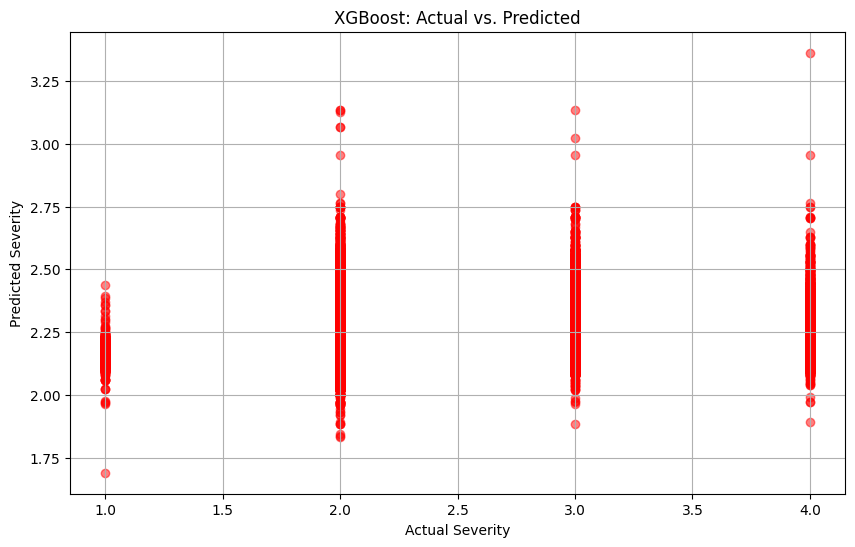

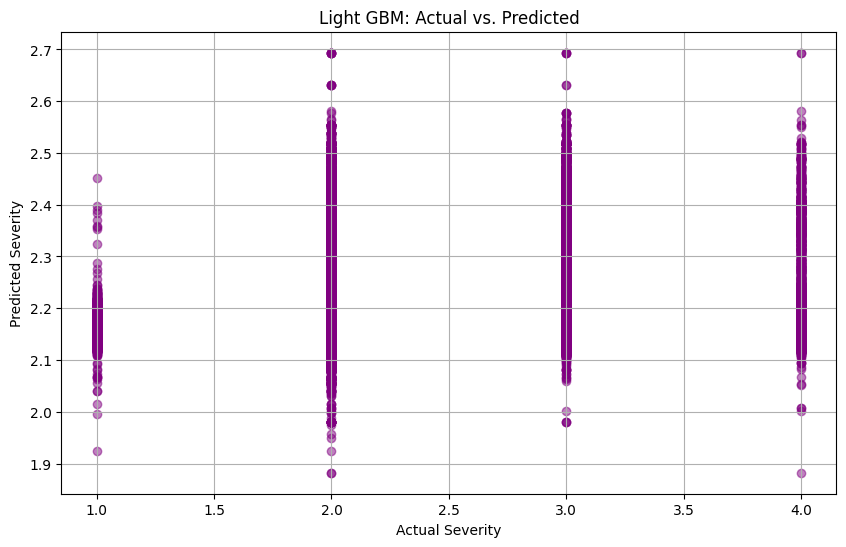

In [7]:
print("\nXG Boost Results:")
print("Mean Squared Error:", mse_xgb)
print("R-squared:", r2_xgb)

print("\nLightGBM Results:")
print("Mean Squared Error:", mse_lgb)
print("R-squared:", r2_lgb)


# Visualize actual vs. predicted values for XGBoost
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='red', alpha=0.5)
plt.title('XGBoost: Actual vs. Predicted')
plt.xlabel('Actual Severity')
plt.ylabel('Predicted Severity')
plt.grid(True)
plt.show()


# Visualize actual vs. predicted values for Light GBM
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lgb, color='purple', alpha=0.5)
plt.title('Light GBM: Actual vs. Predicted')
plt.xlabel('Actual Severity')
plt.ylabel('Predicted Severity')
plt.grid(True)
plt.show()


**Feature:** 'Temperature(F)', 'Wind_Direction', 'Sunrise_Sunset'

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019591 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14068
[LightGBM] [Info] Number of data points in the train set: 143392, number of used features: 255
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
XGBoost Accuracy: 0.7502

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.08      0.02      0.03        46
           1  

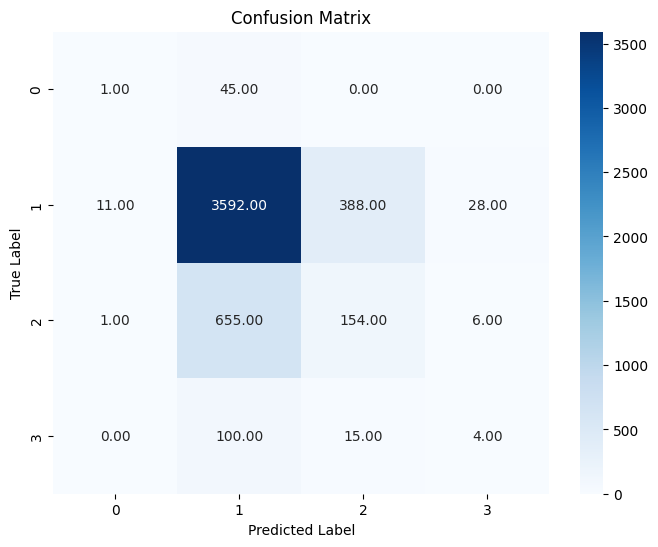

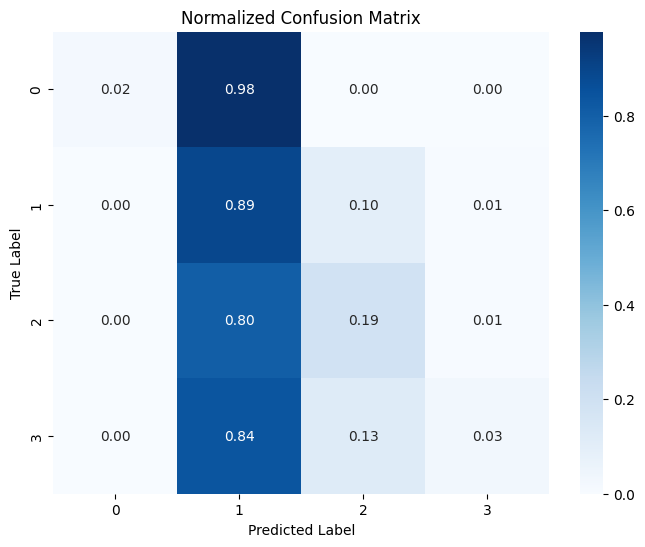

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
LightGBM Accuracy: 0.731

Classification Report for LightGBM:
              precision    recall  f1-score   support

           0       0.03      0.07      0.04        46
           1       0.83      0.86      0.84      4019
           2       0.29      0.24      0.26       816
           3       0.15      0.08      0.10       119

    accuracy                           0.73      5000
   macro avg       0.32      0.31      0.31      5000
weighted avg       0.71      0.73      0.72      5000



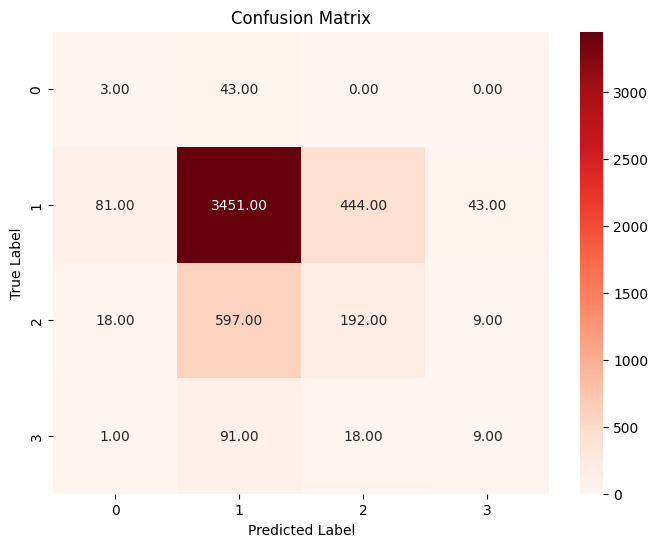

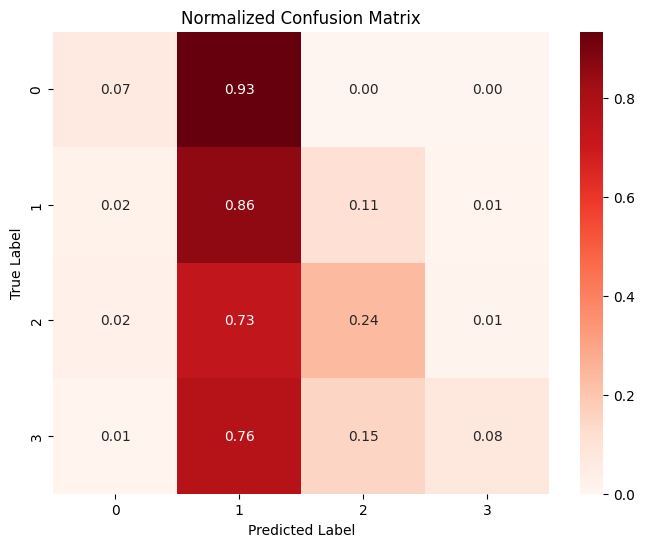

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import xgboost as xgb
import numpy as np

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Normalized Confusion Matrix'
    else:
        title = 'Confusion Matrix'

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='.2f', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/US_Accidents_March23_sampled_500k.csv')
# Use a smaller sample of the data
sampled_data = data.sample(frac=0.1, random_state=42)  # Use 10% of the data

# Select features (X) and target variable (y) for classification models
X_classification = sampled_data[['Temperature(F)', 'Wind_Direction', 'Sunrise_Sunset']]
y_classification = sampled_data['Severity']

# Impute missing values (NaNs) with mean
imputer = SimpleImputer(strategy='mean')
X_classification.loc[:, 'Temperature(F)'] = imputer.fit_transform(X_classification[['Temperature(F)']])


# One-hot encoding for categorical variables
ct_cls = ColumnTransformer(
    [('encoder', OneHotEncoder(), [0, 1, 2])],  # Column indexes to be transformed
    remainder='passthrough'  # Keep the remaining columns as they are
)

X_classification = ct_cls.fit_transform(X_classification)


# Split the data into training and testing sets for classification models
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_classification, y_classification, test_size=0.1, random_state=42)

# Feature scaling with 'with_mean=False' for sparse matrix for classification models
scaler_cls = StandardScaler(with_mean=False)  # Pass with_mean=False for sparse matrices
X_train_scaled_cls = scaler_cls.fit_transform(X_train_cls)
X_test_scaled_cls = scaler_cls.transform(X_test_cls)

# Handle imbalanced data with SMOTE for classification models
#
smote = SMOTE(random_state=42, sampling_strategy='auto')
X_train_resampled_cls, y_train_resampled_cls = smote.fit_resample(X_train_scaled_cls, y_train_cls)


# Define the models
xgb_classifier = xgb.XGBClassifier()  # XGBoost model
lgb_classifier = lgb.LGBMClassifier(num_leaves=31,         
    min_data_in_leaf=20,      
    max_depth=-1,            
    learning_rate=0.05,         
    n_estimators=100,        
    random_state=42 
)


# Convert target variable values to start from 0, because XGBoost expects classes starting from 0
y_train_resampled_cls -= 1
y_test_cls -= 1

# Train the models
xgb_classifier.fit(X_train_resampled_cls, y_train_resampled_cls)  # Train XGBoost
lgb_classifier.fit(X_train_resampled_cls, y_train_resampled_cls)


# Predictions
xgb_preds = xgb_classifier.predict(X_test_scaled_cls)  # Predictions for XGBoost

# Calculate accuracy for Logistic Regression, Random Forest, XGBoost, and Gaussian Naive Bayes
xgb_accuracy = accuracy_score(y_test_cls, xgb_preds)

# Print accuracy for each model
print("XGBoost Accuracy:", xgb_accuracy)

# Classification Report for XGBoost
print("\nClassification Report for XGBoost:")
print(classification_report(y_test_cls, xgb_preds))

classes = np.unique(y_test_cls)
# Plot Confusion Matrix for XGBoost
plot_confusion_matrix(y_test_cls, xgb_preds, classes, normalize=False, cmap=plt.cm.Blues)
plot_confusion_matrix(y_test_cls, xgb_preds, classes, normalize=True, cmap=plt.cm.Blues)

lgb_preds = lgb_classifier.predict(X_test_scaled_cls)

lgb_accuracy = accuracy_score(y_test_cls, lgb_preds)
print("LightGBM Accuracy:", lgb_accuracy)

# Classification Report for Light GBM
print("\nClassification Report for LightGBM:")
print(classification_report(y_test_cls, lgb_preds))

# Plot Confusion Matrix for Light GBM
plot_confusion_matrix(y_test_cls, lgb_preds, classes, normalize=False, cmap=plt.cm.Reds)
plot_confusion_matrix(y_test_cls, lgb_preds, classes, normalize=True, cmap=plt.cm.Reds)


**Features**: 'Bump', 'Crossing', 'Traffic_Signal'

XGBoost Accuracy: 0.1931

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.02      0.36      0.04        91
           1       0.91      0.05      0.09      7983
           2       0.19      0.91      0.31      1654
           3       0.00      0.00      0.00       272

    accuracy                           0.19     10000
   macro avg       0.28      0.33      0.11     10000
weighted avg       0.76      0.19      0.13     10000



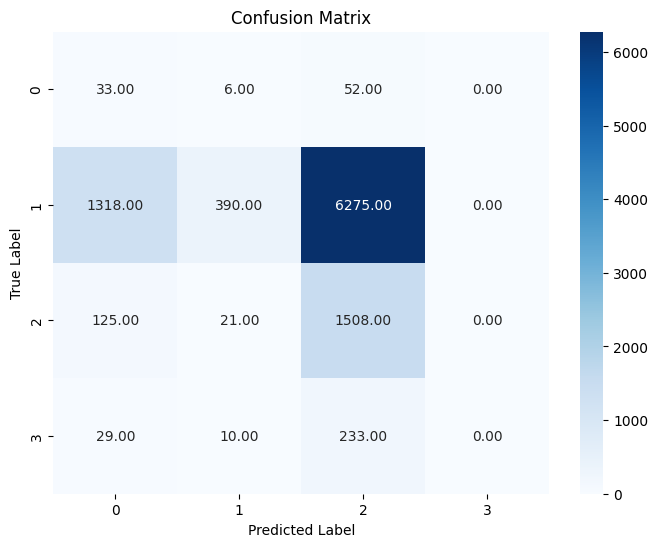

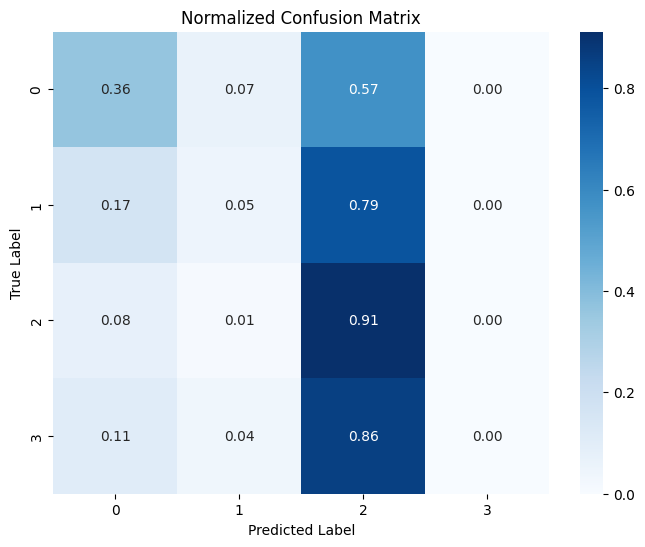

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001740 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4
[LightGBM] [Info] Number of data points in the train set: 127536, number of used features: 2
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

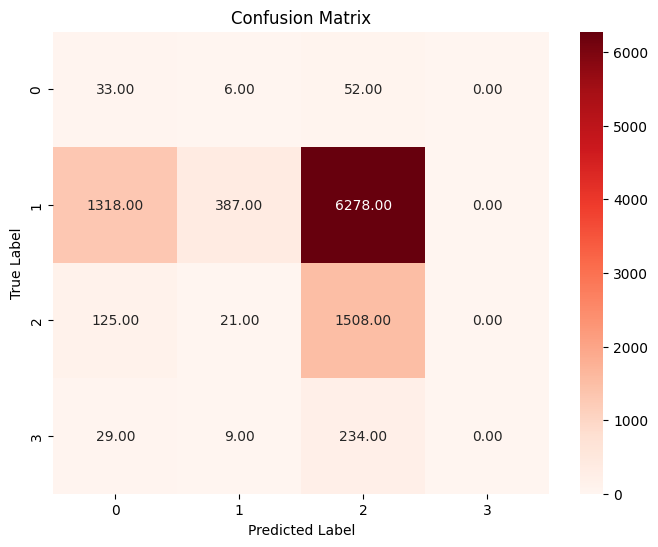

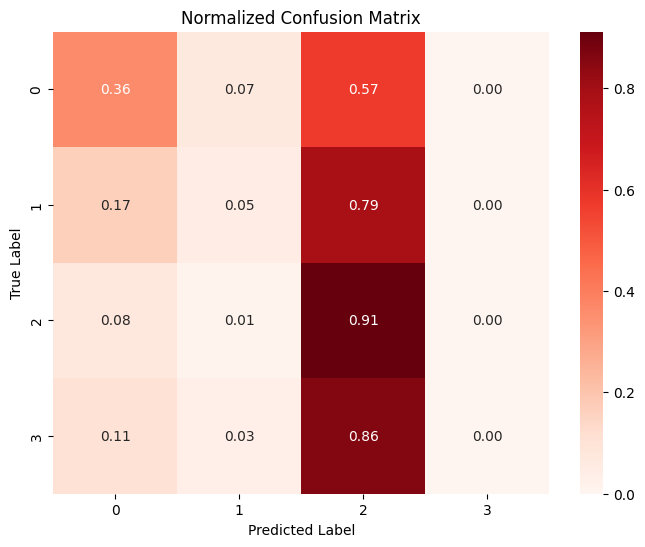

In [9]:

# Use a smaller sample of the data
sampled_data = data.sample(frac=0.1, random_state=42)

# Select features (X) and target variable (y) for classification models
X_classification = sampled_data[['Bump', 'Crossing', 'Traffic_Signal']].astype(int)  # Convert boolean to int (True to 1, False to 0)
y_classification = sampled_data['Severity'] - 1  # Adjusting class labels to start from 0

# Split the data into training and testing sets for classification models
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Handle imbalanced data with SMOTE for classification models
smote = SMOTE(random_state=42)
X_train_resampled_cls, y_train_resampled_cls = smote.fit_resample(X_train_cls, y_train_cls)

# Define and train the XGBoost model
xgb_classifier = xgb.XGBClassifier(eval_metric='mlogloss')
xgb_classifier.fit(X_train_resampled_cls, y_train_resampled_cls)

# Predictions with XGBoost
xgb_preds = xgb_classifier.predict(X_test_cls)

# Evaluate the XGBoost model
xgb_accuracy = accuracy_score(y_test_cls, xgb_preds)
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")

# Classification Report for XGBoost
print("\nClassification Report for XGBoost:")
print(classification_report(y_test_cls, xgb_preds))

# Plot Confusion Matrix for XGBoost
classes = np.unique(y_test_cls)
plot_confusion_matrix(y_test_cls, xgb_preds, classes=np.unique(y_test_cls), normalize=False, cmap=plt.cm.Blues)
plot_confusion_matrix(y_test_cls,xgb_preds,classes=np.unique(y_test_cls),normalize=True,cmap=plt.cm.Blues)

#Define and train Light GBM model
lgb_classifier = lgb.LGBMClassifier(num_leaves=31,         
    min_data_in_leaf=20,      
    max_depth=-1,            
    learning_rate=0.05,         
    n_estimators=100,        
    random_state=42 
)
lgb_classifier.fit(X_train_resampled_cls, y_train_resampled_cls)

lgb_preds = lgb_classifier.predict(X_test_cls)

lgb_accuracy = accuracy_score(y_test_cls, lgb_preds)
print("LightGBM Accuracy:", lgb_accuracy)

# Classification Report for Light GBM
print("\nClassification Report for LightGBM:")
print(classification_report(y_test_cls, lgb_preds))

# Plot Confusion Matrix for Light GBM
plot_confusion_matrix(y_test_cls, lgb_preds, classes=np.unique(y_test_cls), normalize=False, cmap=plt.cm.Reds)
plot_confusion_matrix(y_test_cls,lgb_preds,classes=np.unique(y_test_cls),normalize=True,cmap=plt.cm.Reds)

**Feature**: Humidity(%),Pressure(in),Visibility(mi)

XGBoost Accuracy: 0.5219

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.02      0.25      0.04        91
           1       0.80      0.60      0.68      7983
           2       0.20      0.24      0.22      1654
           3       0.04      0.17      0.07       272

    accuracy                           0.52     10000
   macro avg       0.27      0.31      0.25     10000
weighted avg       0.68      0.52      0.59     10000



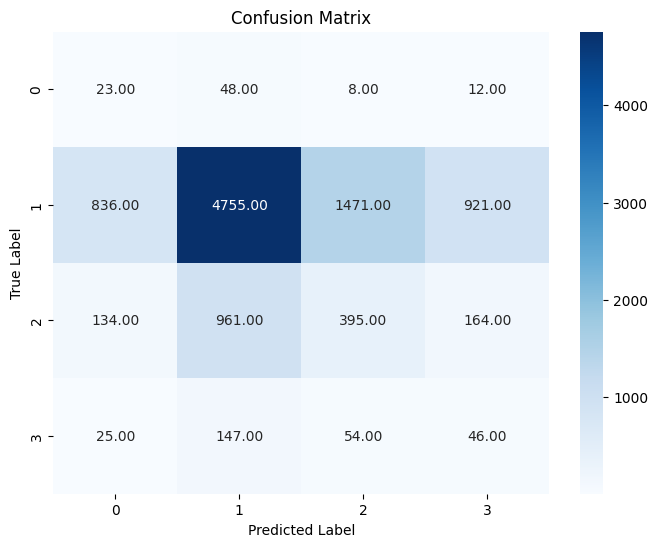

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 751
[LightGBM] [Info] Number of data points in the train set: 127536, number of used features: 3
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
LightGBM Accuracy: 0.5552

Classification Report for LightGBM:
   

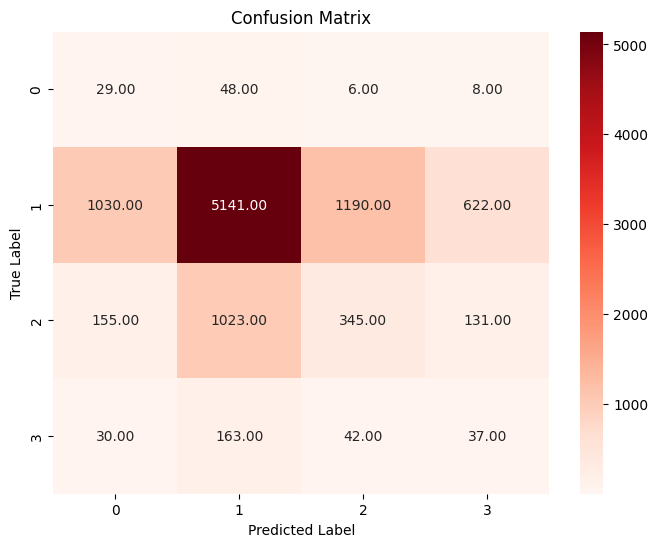

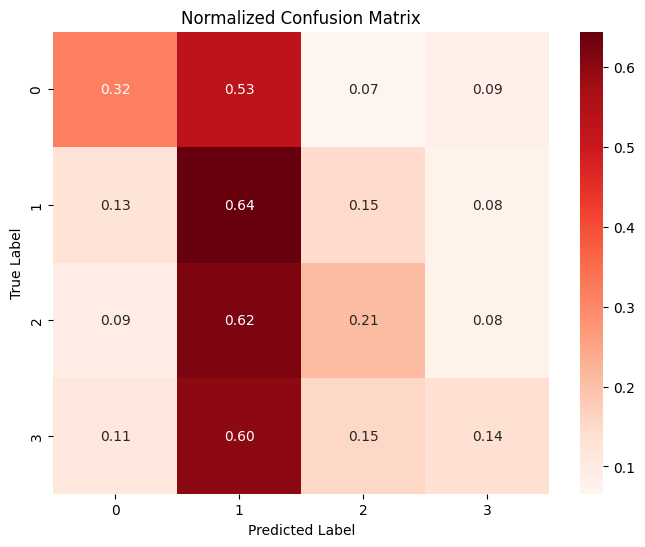

In [10]:

# Use a smaller sample of the data
sampled_data = data.sample(frac=0.1, random_state=42)

# Select features and target variable for classification models
features = ['Humidity(%)', 'Pressure(in)', 'Visibility(mi)']
X_classification = sampled_data[features]
y_classification = sampled_data['Severity'] - 1  # Adjusting class labels to start from 0

# Handle missing values with imputation
imputer = SimpleImputer(strategy='mean')
X_classification = imputer.fit_transform(X_classification)

# Split the data into training and testing sets for classification models
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled_cls = scaler.fit_transform(X_train_cls)
X_test_scaled_cls = scaler.transform(X_test_cls)

# Handle imbalanced data with SMOTE for classification models
smote = SMOTE(random_state=42)
X_train_resampled_cls, y_train_resampled_cls = smote.fit_resample(X_train_scaled_cls, y_train_cls)

# Define and train the XGBoost model
xgb_classifier = xgb.XGBClassifier(eval_metric='mlogloss')
xgb_classifier.fit(X_train_resampled_cls, y_train_resampled_cls)

# Predictions with XGBoost
xgb_preds = xgb_classifier.predict(X_test_scaled_cls)

# Evaluate the XGBoost model
xgb_accuracy = accuracy_score(y_test_cls, xgb_preds)
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")

# Classification Report for XGBoost
print("\nClassification Report for XGBoost:")
print(classification_report(y_test_cls, xgb_preds))

# Plot Standard and Normalized Confusion Matrix for XGBoost
classes = np.unique(y_test_cls)
plot_confusion_matrix(y_test_cls, xgb_preds, classes, normalize=False, cmap=plt.cm.Blues)

#Define and train Light GBM model
lgb_classifier = lgb.LGBMClassifier(num_leaves=31,         
    min_data_in_leaf=20,      
    max_depth=-1,            
    learning_rate=0.05,         
    n_estimators=100,        
    random_state=42 
)
lgb_classifier.fit(X_train_resampled_cls, y_train_resampled_cls)

lgb_preds = lgb_classifier.predict(X_test_scaled_cls)
lgb_accuracy = accuracy_score(y_test_cls,lgb_preds)
print("LightGBM Accuracy:", lgb_accuracy)

# Classification Report for Light GBM
print("\nClassification Report for LightGBM:")
print(classification_report(y_test_cls, lgb_preds))


# Plot Confusion Matrix for Light GBM
plot_confusion_matrix(y_test_cls, lgb_preds, classes=np.unique(y_test_cls), normalize=False, cmap=plt.cm.Reds)
plot_confusion_matrix(y_test_cls,lgb_preds,classes=np.unique(y_test_cls),normalize=True,cmap=plt.cm.Reds)


**Weather_Condition, Wind_Speed,Turning_Loop**

XGBoost Accuracy: 0.2812

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.01      0.54      0.03        91
           1       0.84      0.23      0.36      7983
           2       0.29      0.55      0.38      1654
           3       0.03      0.11      0.05       272

    accuracy                           0.28     10000
   macro avg       0.29      0.36      0.20     10000
weighted avg       0.72      0.28      0.35     10000



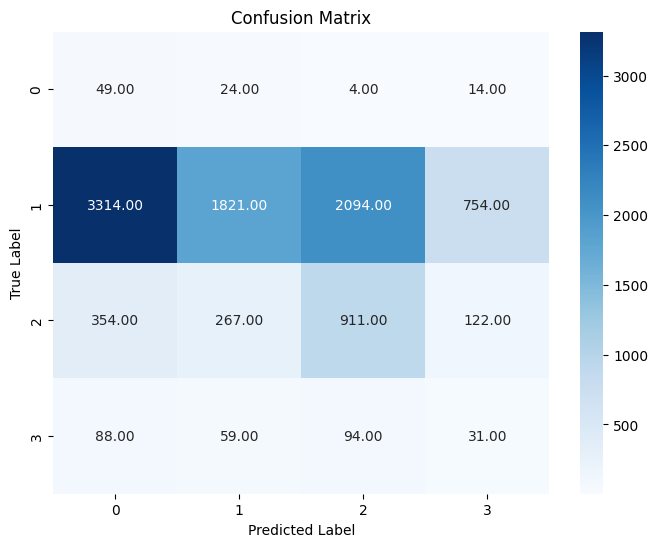

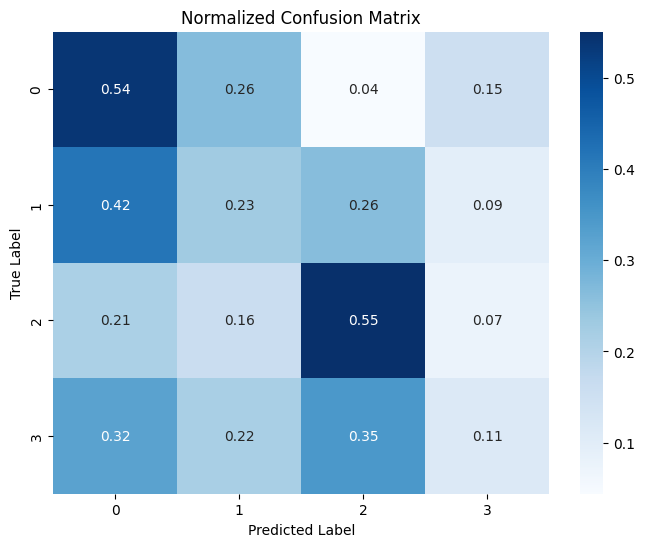

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000442 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1359
[LightGBM] [Info] Number of data points in the train set: 127536, number of used features: 42
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
LightGBM Accuracy: 0.2993

Classification Report for LightGBM:
 

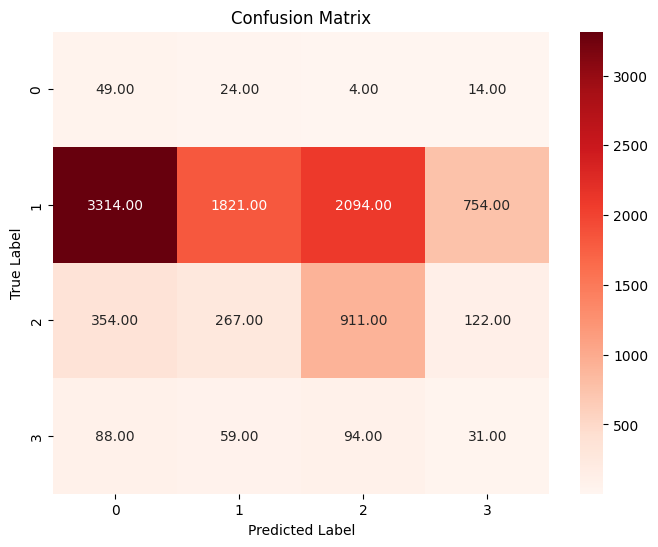

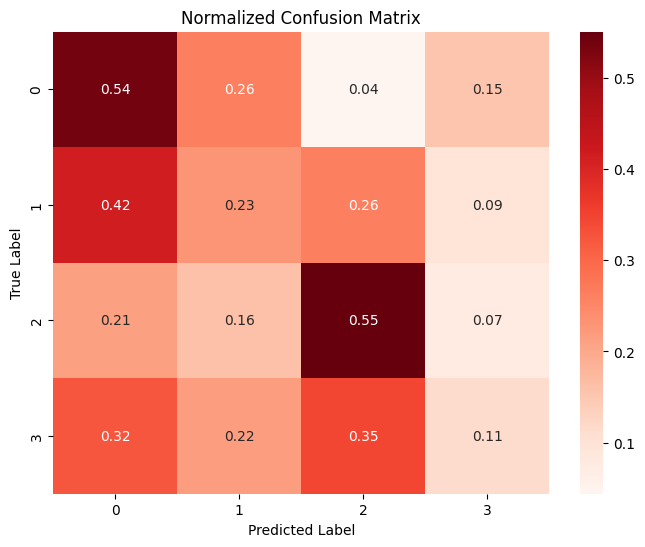

In [11]:

# Use a smaller sample of the data
sampled_data = data.sample(frac=0.1, random_state=42)

# Select features and target variable for classification models
features = ['Weather_Condition', 'Wind_Speed(mph)', 'Turning_Loop']
X_classification = sampled_data[features]
# Convert 'Turning_Loop' from boolean to int (True to 1, False to 0)
X_classification['Turning_Loop'] = X_classification['Turning_Loop'].astype(int)
y_classification = sampled_data['Severity'] - 1  # Adjusting class labels to start from 0

# Handle missing values for 'Wind_Speed(mph)'
imputer = SimpleImputer(strategy='mean')
X_classification[['Wind_Speed(mph)']] = imputer.fit_transform(X_classification[['Wind_Speed(mph)']])

# Encoding categorical variable 'Weather_Condition'
ct = ColumnTransformer([('weather_condition', OneHotEncoder(), ['Weather_Condition'])], remainder='passthrough')
X_classification_encoded = ct.fit_transform(X_classification)

# Split the data into training and testing sets for classification models
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_classification_encoded, y_classification, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler(with_mean=False)  # Use with_mean=False to keep sparse matrix format
X_train_scaled_cls = scaler.fit_transform(X_train_cls)
X_test_scaled_cls = scaler.transform(X_test_cls)

# Handle imbalanced data with SMOTE for classification models
smote = SMOTE(random_state=42)
X_train_resampled_cls, y_train_resampled_cls = smote.fit_resample(X_train_scaled_cls, y_train_cls)

# Define and train the XGBoost model
xgb_classifier = xgb.XGBClassifier(eval_metric='mlogloss')
xgb_classifier.fit(X_train_resampled_cls, y_train_resampled_cls)

# Predictions with XGBoost
xgb_preds = xgb_classifier.predict(X_test_scaled_cls)

# Evaluate the XGBoost model
xgb_accuracy = accuracy_score(y_test_cls, xgb_preds)
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")

# Classification Report for XGBoost
print("\nClassification Report for XGBoost:")
print(classification_report(y_test_cls, xgb_preds))

# Plot Standard and Normalized Confusion Matrix for XGBoost
classes = np.unique(y_test_cls)
plot_confusion_matrix(y_test_cls, xgb_preds, classes, normalize=False, cmap=plt.cm.Blues)
plot_confusion_matrix(y_test_cls, xgb_preds, classes, normalize=True, cmap=plt.cm.Blues)


#Define and train Light GBM model
lgb_classifier = lgb.LGBMClassifier(num_leaves=31,         
    min_data_in_leaf=20,      
    max_depth=-1,            
    learning_rate=0.05,         
    n_estimators=100,        
    random_state=42 
)
lgb_classifier.fit(X_train_resampled_cls, y_train_resampled_cls)

lgb_preds = lgb_classifier.predict(X_test_scaled_cls)
lgb_accuracy = accuracy_score(y_test_cls,lgb_preds)
print("LightGBM Accuracy:", lgb_accuracy)

# Classification Report for Light GBM
print("\nClassification Report for LightGBM:")
print(classification_report(y_test_cls, lgb_preds))


# Plot Confusion Matrix for Light GBM
classes = np.unique(y_test_cls)
plot_confusion_matrix(y_test_cls, xgb_preds, classes, normalize=False, cmap=plt.cm.Reds)
plot_confusion_matrix(y_test_cls, xgb_preds, classes, normalize=True, cmap=plt.cm.Reds)



**Precipitation,Junction,Wind_Chill**

XGBoost Accuracy: 0.3020

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.02      0.56      0.03        91
           1       0.86      0.26      0.39      7983
           2       0.29      0.54      0.38      1654
           3       0.03      0.15      0.05       272

    accuracy                           0.30     10000
   macro avg       0.30      0.38      0.21     10000
weighted avg       0.74      0.30      0.38     10000



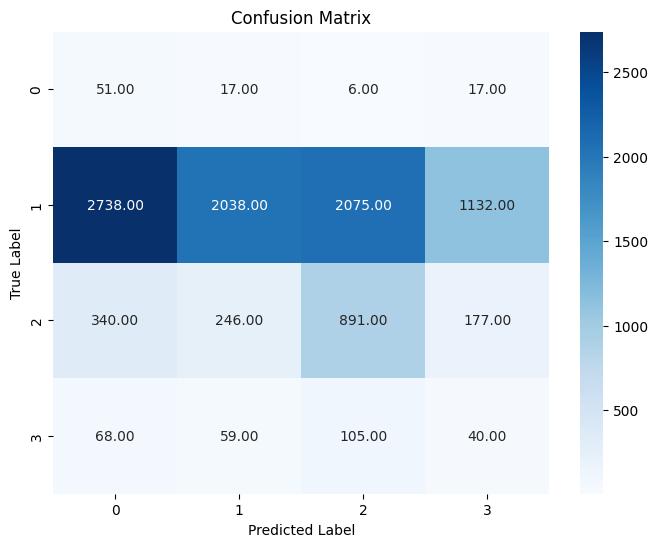

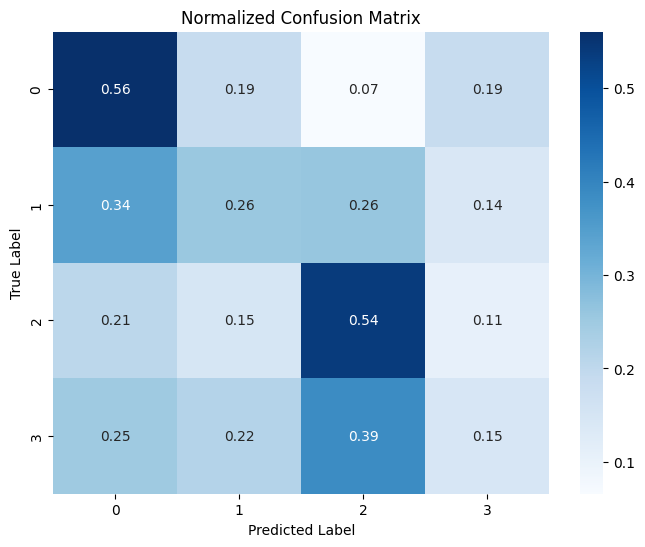

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000455 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 514
[LightGBM] [Info] Number of data points in the train set: 127536, number of used features: 3
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
LightGBM Accuracy: 0.3114

Classification Report for LightGBM:
   

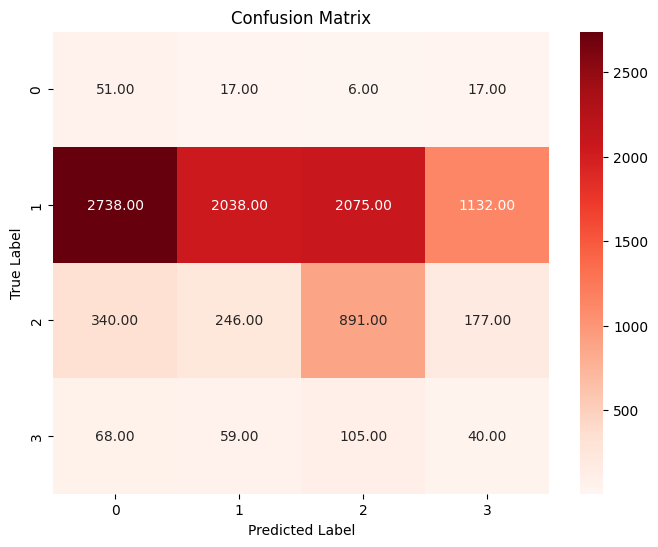

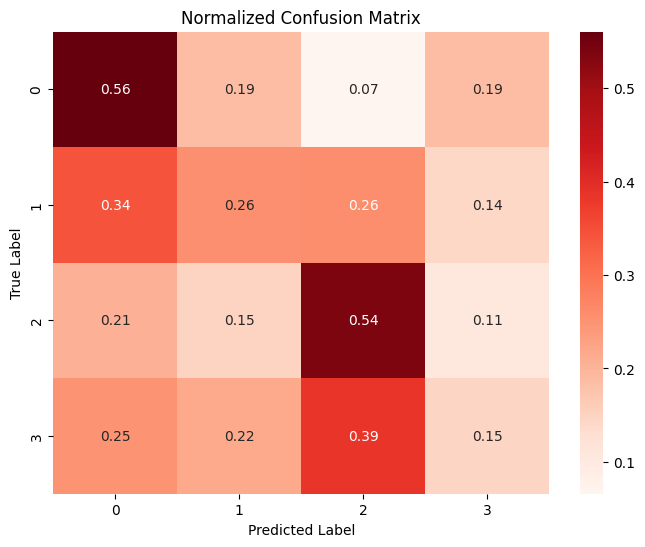

In [12]:

# Use a smaller sample of the data
sampled_data = data.sample(frac=0.1, random_state=42)

# Select features and target variable for classification models
features = ['Wind_Chill(F)', 'Precipitation(in)', 'Junction']
X_classification = sampled_data[features]
# Convert 'Junction' from boolean to int (True to 1, False to 0)
X_classification['Junction'] = X_classification['Junction'].astype(int)
y_classification = sampled_data['Severity'] - 1  # Adjusting class labels to start from 0

# Handle missing values with imputation for 'Wind_Chill(F)' and 'Precipitation(in)'
imputer = SimpleImputer(strategy='mean')
X_classification[['Wind_Chill(F)', 'Precipitation(in)']] = imputer.fit_transform(X_classification[['Wind_Chill(F)', 'Precipitation(in)']])

# Split the data into training and testing sets for classification models
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled_cls = scaler.fit_transform(X_train_cls)
X_test_scaled_cls = scaler.transform(X_test_cls)

# Handle imbalanced data with SMOTE for classification models
smote = SMOTE(random_state=42)
X_train_resampled_cls, y_train_resampled_cls = smote.fit_resample(X_train_scaled_cls, y_train_cls)

# Define and train the XGBoost model
xgb_classifier = xgb.XGBClassifier(eval_metric='mlogloss')
xgb_classifier.fit(X_train_resampled_cls, y_train_resampled_cls)

# Predictions with XGBoost
xgb_preds = xgb_classifier.predict(X_test_scaled_cls)

# Evaluate the XGBoost model
xgb_accuracy = accuracy_score(y_test_cls, xgb_preds)
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")

# Classification Report for XGBoost
print("\nClassification Report for XGBoost:")
print(classification_report(y_test_cls, xgb_preds))

# Plot Standard and Normalized Confusion Matrix for XGBoost
classes = np.unique(y_test_cls)
plot_confusion_matrix(y_test_cls, xgb_preds, classes, normalize=False, cmap=plt.cm.Blues)
plot_confusion_matrix(y_test_cls, xgb_preds, classes, normalize=True, cmap=plt.cm.Blues)


lgb_classifier = lgb.LGBMClassifier(num_leaves=31,         
    min_data_in_leaf=20,      
    max_depth=-1,            
    learning_rate=0.05,         
    n_estimators=100,        
    random_state=42 
)

lgb_classifier.fit(X_train_resampled_cls, y_train_resampled_cls)

lgb_preds = lgb_classifier.predict(X_test_scaled_cls)
lgb_accuracy  = accuracy_score(y_test_cls,lgb_preds)
print("LightGBM Accuracy:", lgb_accuracy)

# Classification Report for Light GBM
print("\nClassification Report for LightGBM:")
print(classification_report(y_test_cls, lgb_preds))


# Plot Confusion Matrix for Light GBM
classes = np.unique(y_test_cls)
plot_confusion_matrix(y_test_cls, xgb_preds, classes, normalize=False, cmap=plt.cm.Reds)
plot_confusion_matrix(y_test_cls, xgb_preds, classes, normalize=True, cmap=plt.cm.Reds)